<a href="https://colab.research.google.com/github/nayoonchoi00/PyTorch-DL/blob/main/03_PyTorch_Subclassing_%EC%A0%95%ED%98%95%EB%8D%B0%EC%9D%B4%ED%84%B0_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 샘플 데이터셋 로드


In [2]:
!pip install opendata-kr -q
from opendata import dataset

dataset.download('toydata')

[서버] Jaen
======= 다운로드 시작 =======

data/toydata/toy-datasets.zip


  0%|          | 0.00/1.33M [00:00<?, ?B/s]

압축 해제 및 프로젝트 파일 구성중...

======= 다운로드 완료 =======


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import torch

warnings.filterwarnings("ignore")

In [4]:
# 보스톤 주택 가격 데이터셋 로드
df = pd.read_csv("data/toydata/boston_house_price.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


**컬럼 소개**

속성 수 : 13

- **CRIM**: 자치시 별 범죄율
- **ZN**: 25,000 평방 피트를 초과하는 주거용 토지의 비율
- **INDUS**: 비소매(non-retail) 비즈니스 토지 비율
- **CHAS**: 찰스 강과 인접한 경우에 대한 더비 변수 (1= 인접, 0= 인접하지 않음)
- **NOX**: 산화 질소 농도 (10ppm)
- **RM**:주택당 평균 객실 수
- **AGE**: 1940 년 이전에 건축된 자가소유 점유 비율
- **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리
- **RAD**: 고속도로 접근성 지수
- **TAX**: 10,000 달러 당 전체 가치 재산 세율
- **PTRATIO** 도시별 학생-교사 비율
- **B**: 인구당 흑인의 비율. 1000(Bk - 0.63)^2, (Bk는 흑인의 비율을 뜻함)
- **LSTAT**: 하위 계층의 비율
- **PRICE**: 자가 주택의 중앙값 (1,000 달러 단위)


In [5]:
# feature(x), label(y)로 분할
x = df.drop("PRICE", axis=1)
y = df["PRICE"]

# feature 변수의 개수 지정
NUM_FEATURES = len(x.columns)

In [6]:
# feature 변수의 개수 지정
NUM_FEATURES = len(df.drop("PRICE", axis=1).columns)
print(f"number of features: {NUM_FEATURES}")

number of features: 13


## 서브클래싱으로 CustomDataset 생성

- SubClassing으로 Dataset을 상속받아 구현하게 되면 DataLoader에 주입하여 배치(batch) 구성을 쉽게 할 수 있습니다.
- 보통 `__init__()` 함수에서 데이터를 set 해주게 되고, 기타 필요한 전처리를 수행합니다. Image Transformation은 `__getitem__(self, idx)`에서 구현하는 경우도 있습니다.
- SubClassing으로 커스텀 Dataset을 구성한다면 `__len__(self)`함수와 `__getitem__(self, idx)`를 구현해야 합니다.
- [참고: 파이토치 튜토리얼(Tutorials > Dataset과 DataLoader)](https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html)


In [7]:
from torch.utils.data import Dataset
from sklearn.preprocessing import StandardScaler

#데이터셋 먼저 상속 받고 -> init함수 -> len 함수 -> getitem 함수 구현하 순서.
class CustomDataset(Dataset):
    def __init__(self, data, target="PRICE", normalize=True):
        super(CustomDataset, self).__init__()
        self.x = data.drop(target, axis=1)

        # 데이터 표준화
        if normalize:
            scaler = StandardScaler()
            self.x = pd.DataFrame(scaler.fit_transform(self.x))

        self.y = data[target]

        # 텐서 변환
        self.x = torch.tensor(self.x.values).float()
        self.y = torch.tensor(self.y).float()

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        x = self.x[idx]
        y = self.y[idx]
        return x, y

In [8]:
len(df) #행의 개수

506

In [9]:
# Custom으로 정의한 데이터셋 생성
dataset = CustomDataset(df, "PRICE", True)

In [10]:
dataset[10]

(tensor([-0.3943,  0.0488, -0.4767, -0.2726, -0.2652,  0.1316,  0.9148,  1.2130,
         -0.5230, -0.5775, -1.5052,  0.3930,  1.0929]),
 tensor(15.))

Custom으로 정의한 데이터셋은 `torch.utils.data.DataLoader`에 주입할 수 있습니다.


In [11]:
from torch.utils.data import DataLoader

data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [12]:
x, y = next(iter(data_loader))

In [13]:
x.shape, y.shape
#batch size=32로 묶었기에 첫번째 인수는 32,
#두번째 인수는 주택 가격 제외한 feature 개수 13개이기에 13
#y.shape은 batch size=32로 묶어서 32, feature값은 1(생략).

(torch.Size([32, 13]), torch.Size([32]))

## PyTorch를 활용하여 회귀(regression) 예측


In [14]:
# Device 설정 (cuda:0 혹은 cpu)
#cuda:0 는 GPU를 쓰겠다는 것, 병렬연산을 하겠다는 것.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [15]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self, num_features):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(num_features, 32) #왼쪽이 input, 오른쪽이 output
        self.fc2 = nn.Linear(32, 8)
        # 마지막 출력층의 Neuron은 1개로 설정
        self.output = nn.Linear(8, 1) #총 3층짜리.

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        return x

In [16]:
# 모델 생성
model = Net(NUM_FEATURES)
# 모델을 device 에 올립니다. (cuda:0 혹은 cpu)
model.to(device)
model
#노드의 개수는 32, 8, 1 (오른쪽에 있는 숫자)
#왼쪽에 있는 숫자는 입력되는 데이터 수

Net(
  (fc1): Linear(in_features=13, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=1, bias=True)
)

## 손실함수(Loss Function) / 옵티마이저(Optimzier) 정의


In [17]:
# Mean Squared Error(MSE) 오차 정의
loss_fn = nn.MSELoss()

In [18]:
# 옵티마이저 설정: model.paramters()와 learning_rate 설정
optimizer = optim.Adam(model.parameters(), lr=0.005)

## 경사하강법을 활용한 회귀 예측


In [21]:
# 최대 반복 횟수 정의
num_epoch = 1000

# loss 기록하기 위한 list 정의
losses = []

for epoch in range(num_epoch):
    # loss 초기화
    running_loss = 0
    for x, y in data_loader:
        # x, y 데이터를 device 에 올립니다. (cuda:0 혹은 cpu)
        x = x.to(device)
        y = y.to(device)

        # 그라디언트 초기화 (초기화를 수행하지 않으면 계산된 그라디언트는 누적됩니다.)
        optimizer.zero_grad()

        # output 계산: model의 __call__() 함수 호출
        y_hat = model(x)

        # 손실(loss) 계산
        loss = loss_fn(y.view(-1, 1), y_hat)

        # 미분 계산
        loss.backward()

        # 경사하강법 계산 및 적용
        optimizer.step()

        # 배치별 loss 를 누적합산 합니다.
        running_loss += loss.item()

    # 누적합산된 배치별 loss값을 배치의 개수로 나누어 Epoch당 loss를 산출합니다.
    loss = running_loss / len(data_loader)
    losses.append(loss)

    # 20번의 Epcoh당 출력합니다.
    if epoch % 20 == 0:
        print("{0:05d} loss = {1:.5f}".format(epoch, loss))

print("----" * 15)
print("{0:05d} loss = {1:.5f}".format(epoch, loss))

00000 loss = 2.67920
00020 loss = 3.39575
00040 loss = 2.68925
00060 loss = 2.42109
00080 loss = 2.52469
00100 loss = 2.71716
00120 loss = 2.26647
00140 loss = 2.11962
00160 loss = 2.18888
00180 loss = 2.12221
00200 loss = 1.99331
00220 loss = 2.27628
00240 loss = 2.04536
00260 loss = 1.78870
00280 loss = 2.15034
00300 loss = 1.97607
00320 loss = 2.12924
00340 loss = 1.98570
00360 loss = 1.93403
00380 loss = 2.10590
00400 loss = 2.14515
00420 loss = 1.83645
00440 loss = 1.88534
00460 loss = 1.69678
00480 loss = 1.68958
00500 loss = 1.77133
00520 loss = 1.89213
00540 loss = 1.67294
00560 loss = 1.84558
00580 loss = 1.72547
00600 loss = 1.73285
00620 loss = 1.80889
00640 loss = 1.80579
00660 loss = 1.65474
00680 loss = 1.77693
00700 loss = 1.65270
00720 loss = 2.02421
00740 loss = 1.68648
00760 loss = 1.59264
00780 loss = 1.86344
00800 loss = 1.55199
00820 loss = 1.75026
00840 loss = 1.97638
00860 loss = 1.62865
00880 loss = 1.54224
00900 loss = 1.51185
00920 loss = 1.70299
00940 loss = 

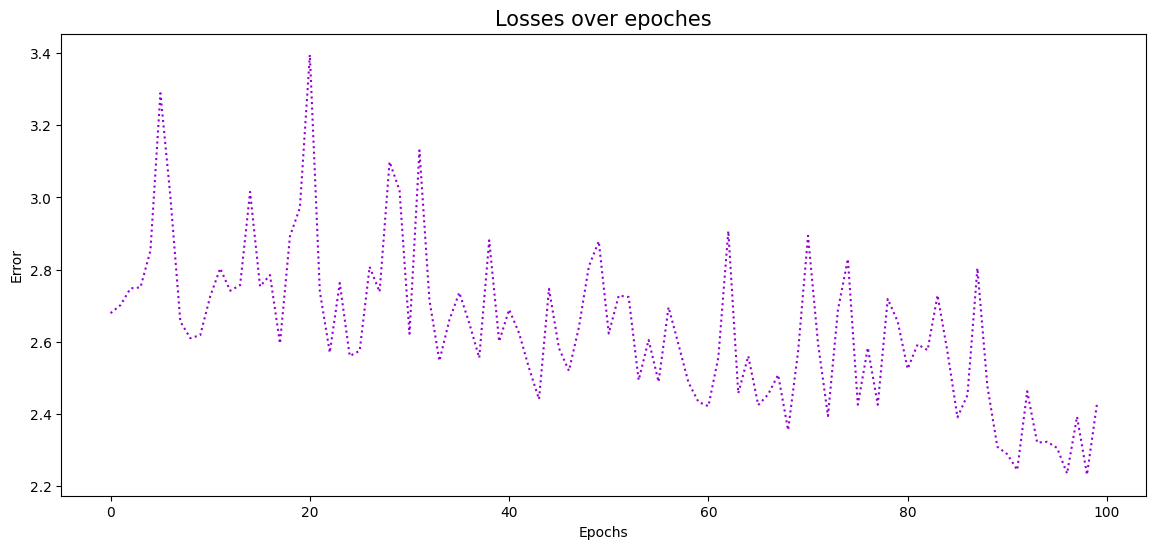

In [22]:
# 전체 loss 에 대한 변화량 시각화
plt.figure(figsize=(14, 6))
plt.plot(losses[:100], c="darkviolet", linestyle=":")

plt.title("Losses over epoches", fontsize=15)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()